In [ ]:
!pip install node2vec

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


# Sample words
words = ["king", "queen", "man", "woman","robot","vehicle","human","AI","phone","apple"]

# Create a simple bag-of-words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(words).toarray()

# Print the vectors
for word, vector in zip(words, X):
  print(f"Word: {word}, Vector: {vector}")


Word: king, Vector: [0 0 0 1 0 0 0 0 0 0]
Word: queen, Vector: [0 0 0 0 0 0 1 0 0 0]
Word: man, Vector: [0 0 0 0 1 0 0 0 0 0]
Word: woman, Vector: [0 0 0 0 0 0 0 0 0 1]
Word: robot, Vector: [0 0 0 0 0 0 0 1 0 0]
Word: vehicle, Vector: [0 0 0 0 0 0 0 0 1 0]
Word: human, Vector: [0 0 1 0 0 0 0 0 0 0]
Word: AI, Vector: [1 0 0 0 0 0 0 0 0 0]
Word: phone, Vector: [0 0 0 0 0 1 0 0 0 0]
Word: apple, Vector: [0 1 0 0 0 0 0 0 0 0]


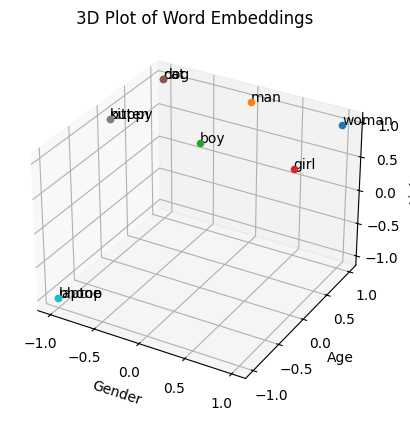

Word: woman, Vector: [1, 1, 1]
Word: man, Vector: [0, 1, 1]
Word: boy, Vector: [0, 0, 1]
Word: girl, Vector: [1, 0, 1]
Word: cat, Vector: [-1, 1, 1]
Word: dog, Vector: [-1, 1, 1]
Word: puppy, Vector: [-1, 0, 1]
Word: kitten, Vector: [-1, 0, 1]
Word: phone, Vector: [-1, -1, -1]
Word: laptop, Vector: [-1, -1, -1]


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the words and their features
words = ["woman", "man", "boy", "girl", "cat", "dog", "puppy", "kitten", "phone", "laptop"]
features = {
    "woman": [1, 1, 1],   # female, adult, living
    "man": [0, 1, 1],     # male, adult, living
    "boy": [0, 0, 1],     # male, child, living
    "girl": [1, 0, 1],    # female, child, living
    "cat": [-1, 1, 1],    # neither male nor female (neutral), adult, living
    "dog": [-1, 1, 1],    # neither male nor female (neutral), adult, living
    "puppy": [-1, 0, 1],  # neither male nor female (neutral), child, living
    "kitten": [-1, 0, 1], # neither male nor female (neutral), child, living
    "phone": [-1, -1, -1],# non-living
    "laptop": [-1, -1, -1]# non-living
}

# Extract the vectors for each word
vectors = np.array([features[word] for word in words])

# Plot the embeddings in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(vectors)):
    ax.scatter(vectors[i][0], vectors[i][1], vectors[i][2])
    ax.text(vectors[i][0], vectors[i][1], vectors[i][2], words[i])

ax.set_title("3D Plot of Word Embeddings")
ax.set_xlabel("Gender")
ax.set_ylabel("Age")
ax.set_zlabel("Living")
plt.show()

# Print the original vectors for reference
for word in words:
    print(f"Word: {word}, Vector: {features[word]}")

In [ ]:
# Import necessary libraries
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import networkx as nx
from node2vec import Node2Vec
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# 1. Word Embeddings using Word2Vec
sentences = [["the", "king", "is", "a", "strong", "man"],
             ["the", "queen", "is", "a", "wise", "woman"],
             ["the", "dog", "is", "a", "loyal", "pet"],
             ["the", "cat", "is", "a", "cute", "pet"]]

word2vec_model = Word2Vec(sentences, vector_size=10, window=5, min_count=1, workers=4)
word_vectors = word2vec_model.wv

print("Word Embeddings:")
for word in word_vectors.index_to_key:
    print(f"Word: {word}, Vector: {word_vectors[word]}")

# 2. Sentence Embeddings using Sentence-BERT
sentence_model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
sentence_embeddings = sentence_model.encode(["The king is a strong man.",
                                             "The queen is a wise woman.",
                                             "The dog is a loyal pet.",
                                             "The cat is a cute pet."])

print("\nSentence Embeddings:")
for sentence, embedding in zip(["The king is a strong man.",
                                "The queen is a wise woman.",
                                "The dog is a loyal pet.",
                                "The cat is a cute pet."], sentence_embeddings):
    print(f"Sentence: {sentence}, Embedding: {embedding}")

# 3. Document Embeddings using Doc2Vec
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]
doc2vec_model = Doc2Vec(documents, vector_size=10, window=5, min_count=1, workers=4)
doc_vectors = [doc2vec_model.dv[i] for i in range(len(documents))]

print("\nDocument Embeddings:")
for i, vector in enumerate(doc_vectors):
    print(f"Document {i}, Vector: {vector}")

# 4. Image Embeddings using a pretrained CNN (ResNet)
image_path = '/content/cat.jpg'  # Replace with the path to your image file
image = Image.open(image_path)
transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
image_tensor = transform(image).unsqueeze(0)

resnet_model = models.resnet50(pretrained=True)
resnet_model.eval()
with torch.no_grad():
    image_embedding = resnet_model(image_tensor).numpy()

print("\nImage Embeddings:")
print(image_embedding)



Word Embeddings:
Word: a, Vector: [-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]
Word: is, Vector: [ 0.07382925 -0.01535195 -0.04533462  0.06548721 -0.04855812 -0.01813456
  0.02880273  0.00993894 -0.08289424 -0.09451611]
Word: the, Vector: [ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
Word: pet, Vector: [-0.0751079  -0.00931534  0.09540492 -0.07321087 -0.02331848 -0.01936983
  0.08078033 -0.05929903  0.00042992 -0.04754474]
Word: cute, Vector: [-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
Word: cat, Vector: [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
Word: loyal, Vector: [-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.02469795
 -0.00888027  0.05533662 -0.02742977  0

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 142MB/s]



Image Embeddings:
[[-2.48757863e+00 -1.57579052e+00 -3.98697233e+00 -2.05207133e+00
  -3.19242215e+00 -1.17279783e-01 -3.65390921e+00 -1.30787218e+00
  -7.82478809e-01 -2.01173830e+00  2.44811580e-01 -4.14603615e+00
  -1.31546116e+00 -2.23872566e+00 -3.28917527e+00  3.33213121e-01
  -2.26064277e+00 -2.67772675e+00 -1.68492484e+00 -3.89829183e+00
  -7.48962641e-01 -1.86824322e+00 -2.34256053e+00 -1.48602712e+00
  -1.34997457e-01 -2.22789049e+00 -1.29746938e+00 -1.56816781e+00
  -1.36025620e+00 -3.41936201e-01 -9.86098766e-01 -1.46293151e+00
  -6.04394257e-01 -3.71271920e+00 -2.05661631e+00 -1.23343861e+00
   9.02697816e-02 -1.36509585e+00  2.53226256e+00  2.12133837e+00
  -7.67456770e-01  2.80893421e+00  3.11565213e-02  2.70214772e+00
   8.16800773e-01 -2.05801511e+00  4.48523521e-01  9.86737192e-01
  -2.77270389e+00 -3.18691659e+00 -1.83319294e+00  1.44203198e+00
  -5.51647186e-01 -1.95739698e+00 -4.59842384e-01 -3.12131858e+00
  -1.00850570e+00 -3.16855407e+00 -2.23448086e+00  1.1379

In [ ]:
import networkx as nx
from node2vec import Node2Vec

# Create a simple graph
G = nx.fast_gnp_random_graph(n=10, p=0.5)

# Generate walks and train the Node2Vec model
node2vec = Node2Vec(G, dimensions=10, walk_length=5, num_walks=10, workers=1)
model = node2vec.fit(window=5, min_count=1)

# Print the embeddings for each node
print("Node2Vec Embeddings:")
for node in G.nodes():
    print(f"Node: {node}, Embedding: {model.wv[str(node)]}")

Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 3183.29it/s]

Node2Vec Embeddings:
Node: 0, Embedding: [ 0.07354388  0.051824    0.06769905  0.00822142  0.06346205 -0.0346604
 -0.00869619  0.05823398 -0.07679845 -0.0399887 ]
Node: 1, Embedding: [-0.07488731 -0.00874539  0.09565575 -0.07253547 -0.02358481 -0.01987215
  0.08134227 -0.05888953 -0.0006142  -0.04787997]
Node: 2, Embedding: [-0.08114862  0.04573126 -0.04090112  0.00906717  0.08467373 -0.0451397
  0.04589967 -0.06739856 -0.03678813  0.09348989]
Node: 3, Embedding: [-0.09549411  0.05120706 -0.08736804 -0.04346798 -0.00027055 -0.00347719
 -0.07586372  0.09656142  0.04820912  0.09160707]
Node: 4, Embedding: [ 0.01694078  0.00253239  0.0348936   0.00309477  0.09595678  0.05013545
 -0.08858296 -0.07013369  0.00750387  0.06323612]
Node: 5, Embedding: [-0.00843011  0.02867216  0.05436917  0.07128429 -0.05720182  0.0183594
  0.061274   -0.04804055 -0.03195453  0.06798562]
Node: 6, Embedding: [-0.0157516   0.00355332 -0.04136408 -0.07671067 -0.01508065  0.02458713
 -0.00881724  0.05557908 -0.027

In [ ]:
from gensim.models import Word2Vec
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

# Sample sentences
sentences = [["king", "queen", "man", "woman"], ["dog", "cat", "pet","machine"], ["car", "bike", "vehicle","human"]]

# Train Word2Vec models with different dimensions
dimensions = [50,100,200,300,500,600,700]
scores = []

for dim in dimensions:
    model = Word2Vec(sentences, vector_size=dim, window=5, min_count=1, workers=4)
    X = [model.wv[word] for word in model.wv.index_to_key]
    y = np.random.randint(0, 2, len(X))  # Random labels for demonstration
    clf = LogisticRegression()
    cv = StratifiedKFold(n_splits=3)  # Reduce the number of splits to 3
    score = cross_val_score(clf, X, y, cv=cv).mean()
    scores.append(score)

print("Scores for different dimensions:", scores)

Scores for different dimensions: [0.3333333333333333, 0.75, 0.6666666666666666, 0.5833333333333334, 0.6666666666666666, 0.5, 0.6666666666666666]


In [ ]:
from sentence_transformers import SentenceTransformer, models
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn.functional as F

# Set random seed for reproducibility
torch.manual_seed(42)

# Load a pretrained model
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Sample sentences
sentences = [
    "The king is a strong man.",
    "The queen is a wise woman.",
    "The dog is a loyal pet.",
    "The cat is a cute pet.",
    "The car is a fast vehicle.",
    "The bike is a convenient vehicle.",
    "The computer is a machine.",
    "The flower is red.",
    "The apple is a fruit.",
    "The Apple is an iPhone.",
    "AI is powerful",
    "man is clever"
]

# Ensure balanced class distribution
labels = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5]  # Assigning labels to ensure balanced classes

# Train Sentence-BERT models with different dimensions
dimensions = [50,100,200,300,400,500,750,1000,2000]
scores = []

for dim in dimensions:
    word_embedding_model = models.Transformer('distilbert-base-uncased')
    pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
    dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=dim, activation_function=F.relu)

    model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

    X = model.encode(sentences, convert_to_tensor=True).cpu().numpy()  # Ensure the encoded sentences are on the CPU
    y = torch.tensor(labels).numpy()  # Convert labels to numpy array
    clf = LogisticRegression()
    cv = StratifiedKFold(n_splits=2)  # Reduce the number of splits to 2 to match the smallest class size
    score = cross_val_score(clf, X, y, cv=cv).mean()
    scores.append((dim, score))

for dim, score in scores:
    print(f"Scores for {dim} dimension: {score}")

Scores for 50 dimension: 0.6666666666666666
Scores for 100 dimension: 0.75
Scores for 200 dimension: 0.6666666666666666
Scores for 300 dimension: 0.75
Scores for 400 dimension: 0.6666666666666666
Scores for 500 dimension: 0.6666666666666666
Scores for 750 dimension: 0.6666666666666666
Scores for 1000 dimension: 0.6666666666666666
Scores for 2000 dimension: 0.6666666666666666
